In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

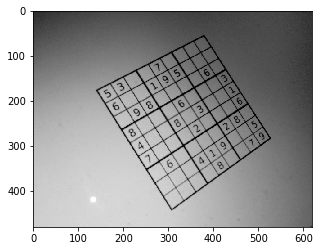

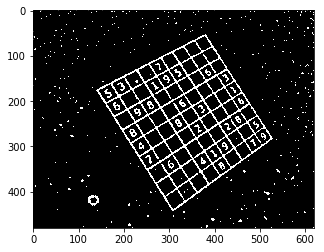

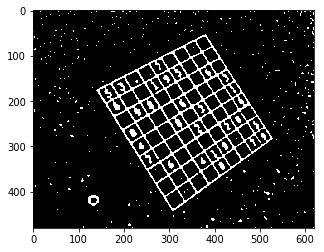

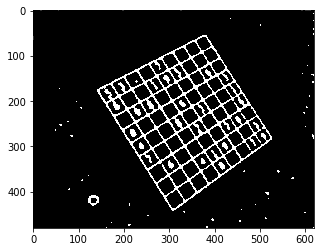

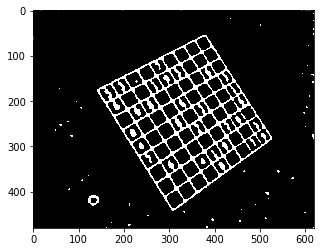

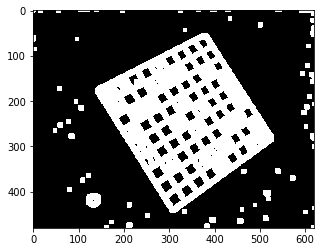

final filtered image


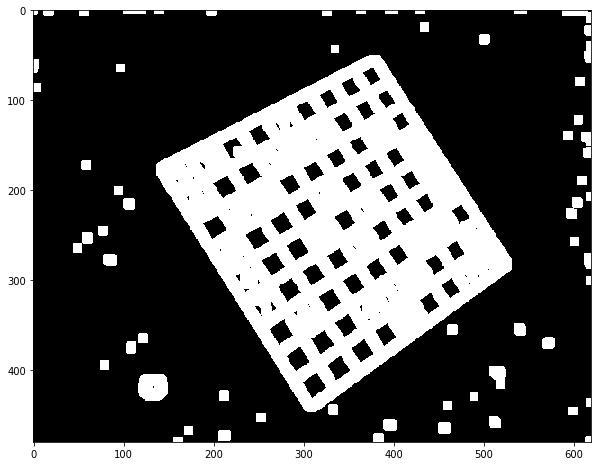

In [2]:
path = "pics/test1.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE )
# img = cv2.equalizeHist(img)
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.show()

blur = cv2.medianBlur(img, 5)
th = 255-cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
plt.imshow(th, cmap="gray")
plt.show()

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
plt.imshow(opening, cmap="gray")
plt.show()

blur2 = cv2.medianBlur(opening, 5)
plt.imshow(blur2, cmap="gray")
plt.show()

opening2 = cv2.morphologyEx(blur2, cv2.MORPH_CLOSE, kernel)
plt.imshow(opening2, cmap="gray")
plt.show()

kernel = np.ones((9,9),np.uint8)
dilation = cv2.dilate(opening2,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")
plt.show()

print("final filtered image")
filtered_img = dilation
plt.figure(figsize=(10,10))
plt.imshow(filtered_img, cmap="gray")
plt.show()

In [209]:
def filter_lines(lines):
#     s = 10
#     lines = lines[s:s+6]
    print("input lines", len(lines))
    ##############
    dp = np.array(list(np.array([np.linalg.norm(lines[i]-lines[j]) for i in range(len(lines)-1, j, -1)]) for j in range(len(lines)-1)))
#     print("dp")
#     for _ in dp:
#         print(_)
#     dp = np.array(list(np.array([np.linalg.norm(lines[i]-lines[j]) for i in range(len(lines))]) for j in range(len(lines))))
#     print("dp")
#     for _ in dp:
#         print(_)
    ###############
    threshold = 5
    indexes = []
    for i in range(len(dp)):
        for j in range(len(dp[i])):
            if dp[i][j]<threshold:
                indexes.append([i, len(lines)-1-j])
#     print("indexes", len(indexes), "\n", indexes)
    indexes = np.array(indexes)
    un_indexes = np.unique(indexes.flatten())

    filtered_lines_indexes = np.where(list(index not in un_indexes for index in range(len(lines))))[0]

    filtered_lines = lines[filtered_lines_indexes]
    return filtered_lines
# print("result", filter_lines(lines))
def longest_lines(lines, n):
    print(lines)
    lengths = np.array(list(np.linalg.norm([x1-x2, y1-y2]) for x1, y1, x2, y2 in line for line in lines))
    print(lengths)
    sorted_indexes = np.argsort(lengths)[::-1]
    print(lengths[sorted_indexes])
print(longest_lines(lines, 10))

[15.55634919 15.55634919 15.55634919 ... 15.55634919 15.55634919
 15.55634919]
[15.55634919 15.55634919 15.55634919 ... 15.55634919 15.55634919
 15.55634919]
None


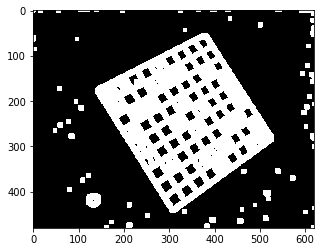

lines 1282


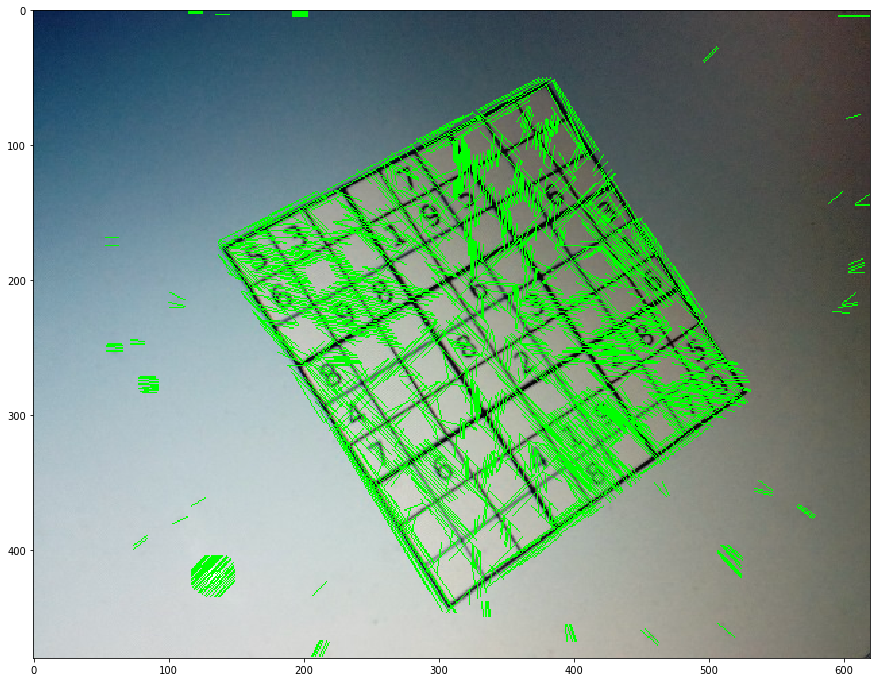

In [3]:
plt.imshow(filtered_img, cmap="gray")
plt.show()

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(filtered_img, 1, np.pi/180, 100, minLineLength, maxLineGap)

# lines = filter_lines(lines)

rgb_img = cv2.imread(path)
print("lines", len(lines))
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(rgb_img, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
    
#     cv2.circle(rgb_img,(x1,y1), 1, (0,0,255), -1)
#     cv2.circle(rgb_img,(x2,y2), 1, (0,0,255), -1)

plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()



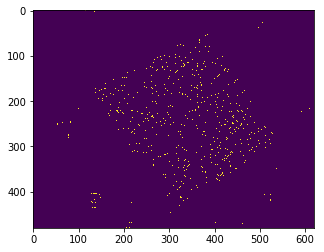

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
48
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


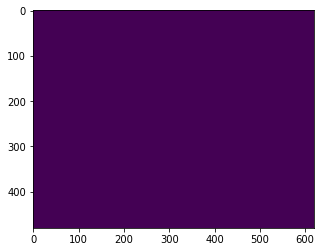

In [236]:
segm = np.zeros(filtered_img.shape)
for line in lines:
    x1, y1, x2, y2 = line[0]
    segm[y1][x1] += 1
    segm[y2][x2] += 1
# plt.figure(figsize=(15, 15))
plt.imshow(segm)
plt.show()

kernel_size = int(filtered_img.shape[0]*0.1)#*(2**0.5)
print(kernel_size)
kernel = np.ones((kernel_size,kernel_size), np.uint8)

conv = cv2.filter2D(img ,-1,kernel)
print(conv)
# plt.figure(figsize=(15, 15))
plt.imshow(conv)
plt.show()

